# Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

# import time
# import math

# import json
# import requests
# import gmaps
# from sodapy import Socrata
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
# from shapely.geometry.polygon import Polygon

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Read in data

In [2]:
df = pd.read_csv('data/venue_neighborhood_category.csv')
df.drop(columns=['Unnamed: 0','venue', 'address', 'latitude', 'longitude'], inplace=True)
df.head()

,neighborhood,category
0,ANDERSON MILL,Fast Food Restaurant
1,ANDERSON MILL,Burger Joint
2,AVERY RANCH--LAKELINE,Wings Joint
3,ANDERSON MILL,Middle Eastern Restaurant
4,ANDERSON MILL,Steakhouse


In [3]:
df = pd.get_dummies(df, columns=['category'], prefix="", prefix_sep="").groupby('neighborhood').sum()
df

,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,Burrito Place,...,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
neighborhood,,,,,,,,,,,,,,,,,,,,,
ALLANDALE,2,2,0,0,1,0,0,0,3,1,...,0,1,0,0,0,1,0,0,1,0
ANDERSON MILL,1,0,1,1,0,0,1,0,3,0,...,1,3,0,0,0,0,0,0,0,0
AVERY RANCH--LAKELINE,2,1,1,0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
BARTON CREEK MALL,1,1,1,1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
BARTON HILLS,1,1,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WINDSOR HILLS,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
WINDSOR PARK,1,0,0,0,0,0,0,0,3,0,...,0,2,0,0,0,0,0,0,0,0
WINDSOR ROAD,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Look at sillouhette score per number of clusters

In [4]:
kmax = 10

for k in range(2, kmax+1):
    model = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(df)
    cluster_labels = model.labels_
        
    silhouette_avg = silhouette_score(df, cluster_labels)
    
    print(f"For n_clusters: {k}, average silhouette score: {silhouette_avg:.3f}")

For n_clusters: 2, average silhouette score: 0.720
For n_clusters: 3, average silhouette score: 0.249
For n_clusters: 4, average silhouette score: 0.192
For n_clusters: 5, average silhouette score: 0.146
For n_clusters: 6, average silhouette score: 0.209
For n_clusters: 7, average silhouette score: 0.123
For n_clusters: 8, average silhouette score: 0.102
For n_clusters: 9, average silhouette score: 0.120
For n_clusters: 10, average silhouette score: 0.084


In [5]:
# Run and fit the k-means clustering model
model = KMeans(init='k-means++', n_clusters=4, random_state=42)
model.fit(df)

KMeans(n_clusters=4, random_state=42)

In [6]:
# Check the neighborhood distrobution
pd.DataFrame(data=pd.Series(data=model.labels_).value_counts(), columns=['Label Count'])

,Label Count
0,61
2,25
1,9
3,1


In [7]:
df.insert(0, 'cluster_label', model.labels_)

In [8]:
df.head(3)

,cluster_label,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,...,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
neighborhood,,,,,,,,,,,,,,,,,,,,,
ALLANDALE,2,2,2,0,0,1,0,0,0,3,...,0,1,0,0,0,1,0,0,1,0
ANDERSON MILL,1,1,0,1,1,0,0,1,0,3,...,1,3,0,0,0,0,0,0,0,0
AVERY RANCH--LAKELINE,1,2,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1


In [9]:
# Function to sort values in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [10]:
label_group_df = df.groupby(['cluster_label']).sum()[0:10]
num_top_venues = 15
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['cluster_label']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
top_10_df = pd.DataFrame(columns=columns)
top_10_df['cluster_label'] = label_group_df.index

for ind in np.arange(label_group_df.shape[0]):
    top_10_df.iloc[ind, 1:] = return_most_common_venues(label_group_df.iloc[ind, :], num_top_venues)

top_10_df.set_index('cluster_label')

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
cluster_label,,,,,,,,,,,,,,,
0,Mexican Restaurant,Serves Impossible Products,Fast Food Restaurant,Food Truck,Pizza Place,Taco Place,Sandwich Place,Restaurant,Burger Joint,Café,Serves Oatly Products,Bakery,Chinese Restaurant,BBQ Joint,Breakfast Spot
1,Serves Impossible Products,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Taco Place,Burger Joint,Food Truck,BBQ Joint,Asian Restaurant,Chinese Restaurant,Donut Shop,Sushi Restaurant,Fried Chicken Joint,Italian Restaurant
2,Mexican Restaurant,Fast Food Restaurant,Food Truck,Taco Place,Serves Impossible Products,Burger Joint,Pizza Place,Sandwich Place,Vietnamese Restaurant,Café,Serves Oatly Products,Bakery,Donut Shop,Fried Chicken Joint,Restaurant
3,Serves Oatly Products,Serves Impossible Products,Mexican Restaurant,BBQ Joint,Pizza Place,Fried Chicken Joint,Italian Restaurant,Breakfast Spot,Taco Place,Steakhouse,Indian Restaurant,New American Restaurant,Restaurant,Fast Food Restaurant,Donut Shop


In [11]:
of_interest = ['Serves Impossible Products', 'Serves Beyond Products', 'Serves Oatly Products', 'Fast Food Restaurant', 'Burger Joint', 
               'Wings Joint', 'Sandwich Place','BBQ Joint','Fried Chicken Joint',
               'Burger Joint', 'Vegetarian / Vegan Restaurant', 'Burrito Place', 
               'Food Truck','Comfort Food Restaurant']

In [12]:
atx = gpd.GeoDataFrame.from_file('data/Neighborhoods/')
atx.head(3)

,fid,target_fid,neighname,sqmiles,shape_leng,shape_area,shape_le_2,geometry
0,3.0,3.0,ANDERSON MILL,8.669086,154458.205390,2.416802e+08,154458.205390,"POLYGON ((-97.79231 30.45671, -97.79154 30.452..."
1,95.0,95.0,WINDSOR PARK,2.383074,40527.378654,6.643628e+07,40527.378654,"POLYGON ((-97.67076 30.30854, -97.67204 30.308..."
2,19.0,19.0,DAWSON,0.495535,17697.924998,1.381473e+07,17697.924998,"POLYGON ((-97.75353 30.23876, -97.75472 30.237..."


In [13]:
# df = df[df['cluster_label'] == 1]
# int(df[df.index == 'DOWNTOWN'].drop(columns='cluster_label').T.sum())

In [14]:
# [i for i in atx['neighname']]

In [15]:
# label_group_df[label_group_df.index == 0]

In [16]:
# cluster_df.loc[[i for i in cluster_df.index if i in of_interest]]

In [17]:
df

,cluster_label,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Buffet,Burger Joint,...,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
neighborhood,,,,,,,,,,,,,,,,,,,,,
ALLANDALE,2,2,2,0,0,1,0,0,0,3,...,0,1,0,0,0,1,0,0,1,0
ANDERSON MILL,1,1,0,1,1,0,0,1,0,3,...,1,3,0,0,0,0,0,0,0,0
AVERY RANCH--LAKELINE,1,2,1,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
BARTON CREEK MALL,1,1,1,1,1,2,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
BARTON HILLS,0,1,1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WINDSOR HILLS,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
WINDSOR PARK,2,1,0,0,0,0,0,0,0,3,...,0,2,0,0,0,0,0,0,0,0
WINDSOR ROAD,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


------- Cluster 0 ---------------------------------------------------------------
                               number_of_venues
Fast Food Restaurant                         38
Food Truck                                   38
Serves Impossible Products                   38
Sandwich Place                               23
Burger Joint                                 21
Serves Oatly Products                        16
BBQ Joint                                    12
Fried Chicken Joint                           6
Wings Joint                                   5
Vegetarian / Vegan Restaurant                 4
Comfort Food Restaurant                       3
Burrito Place                                 1


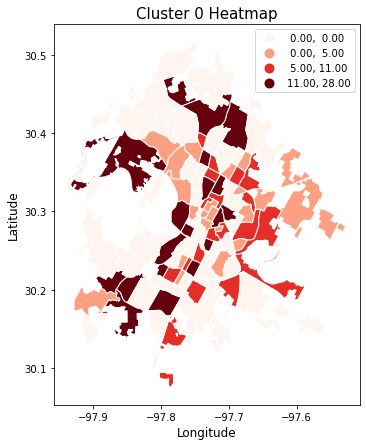

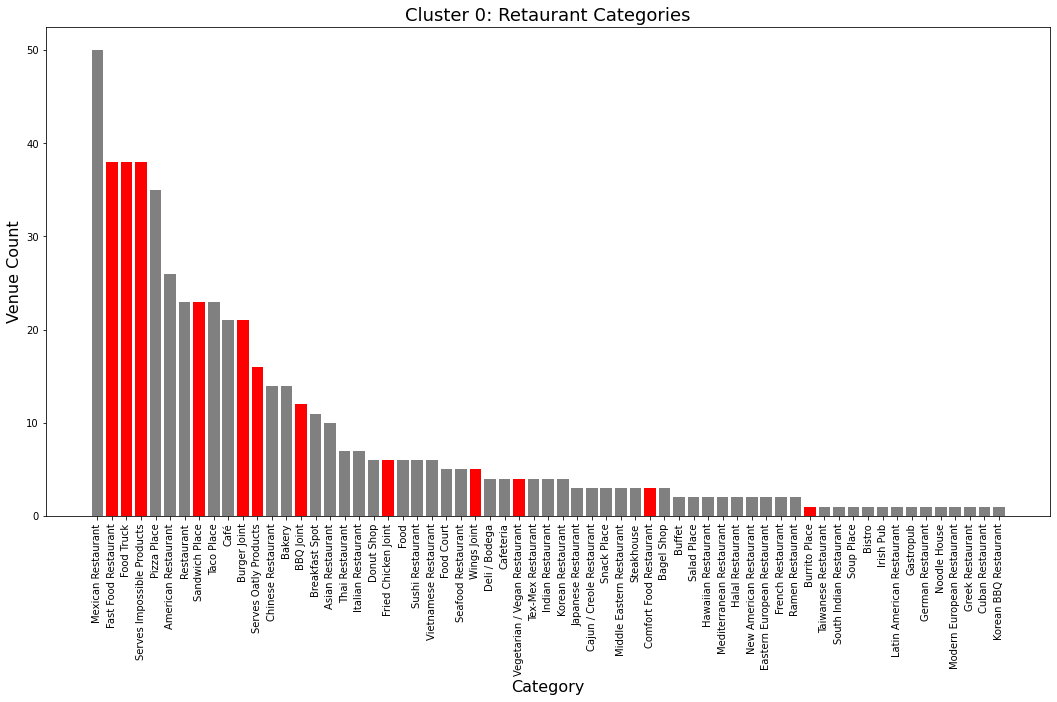

------- Cluster 1 ---------------------------------------------------------------
                            number_of_venues
Serves Impossible Products                35
Fast Food Restaurant                      27
Sandwich Place                            15
Burger Joint                              13
Food Truck                                13
BBQ Joint                                 12
Fried Chicken Joint                        6
Wings Joint                                3
Serves Oatly Products                      2
Burrito Place                              1


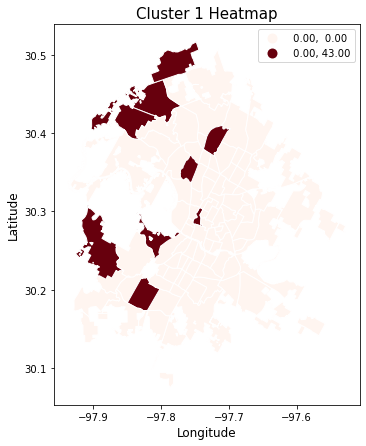

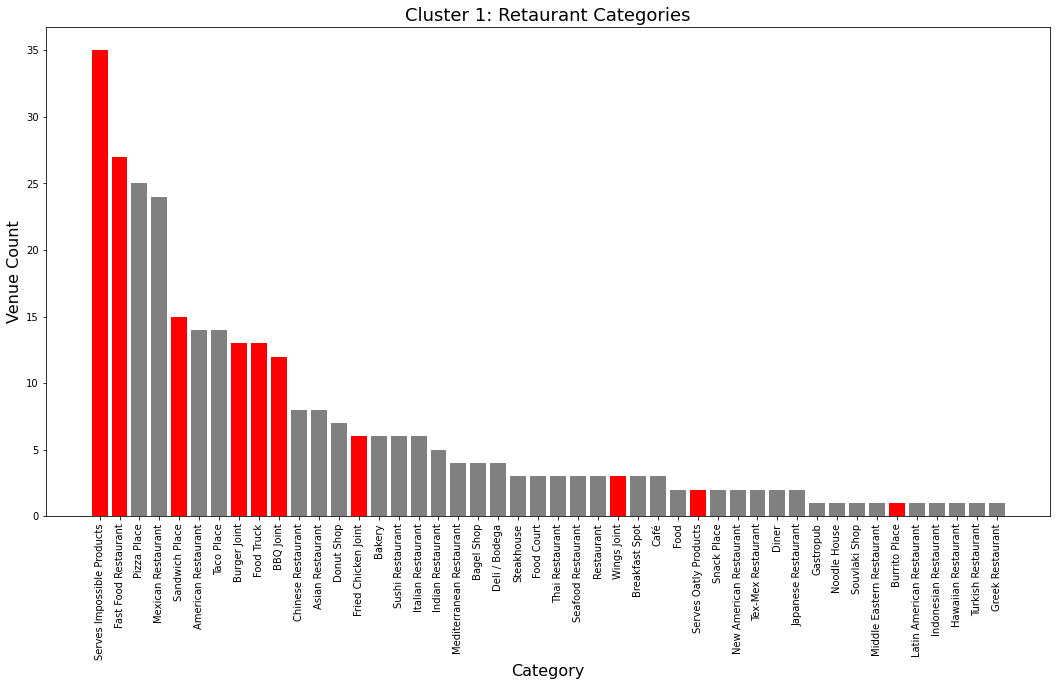

------- Cluster 2 ---------------------------------------------------------------
                               number_of_venues
Fast Food Restaurant                         44
Food Truck                                   32
Serves Impossible Products                   29
Burger Joint                                 25
Sandwich Place                               21
Serves Oatly Products                        12
Fried Chicken Joint                          10
BBQ Joint                                     9
Wings Joint                                   8
Vegetarian / Vegan Restaurant                 2
Burrito Place                                 1
Serves Beyond Products                        1


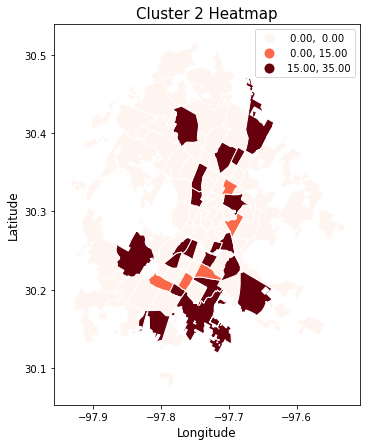

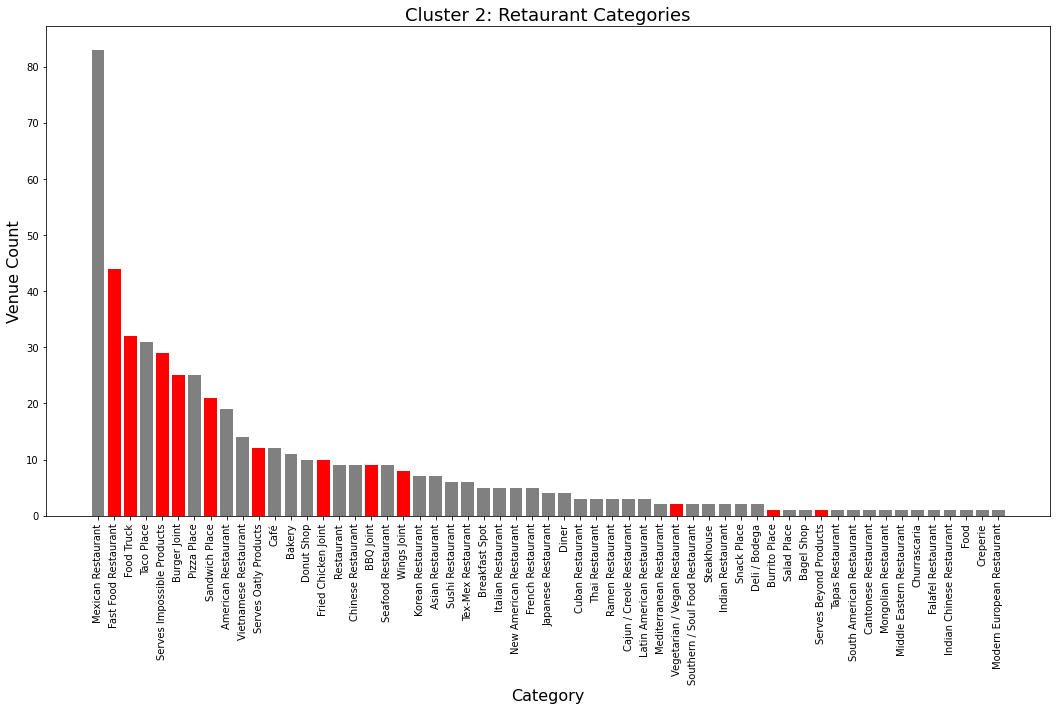

------- Cluster 3 ---------------------------------------------------------------
                            number_of_venues
Serves Oatly Products                     19
Serves Impossible Products                10
BBQ Joint                                  3
Fried Chicken Joint                        3
Fast Food Restaurant                       1
Burger Joint                               1


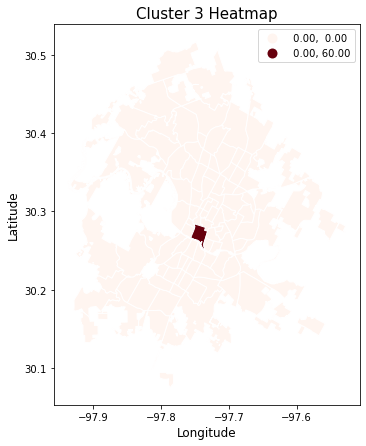

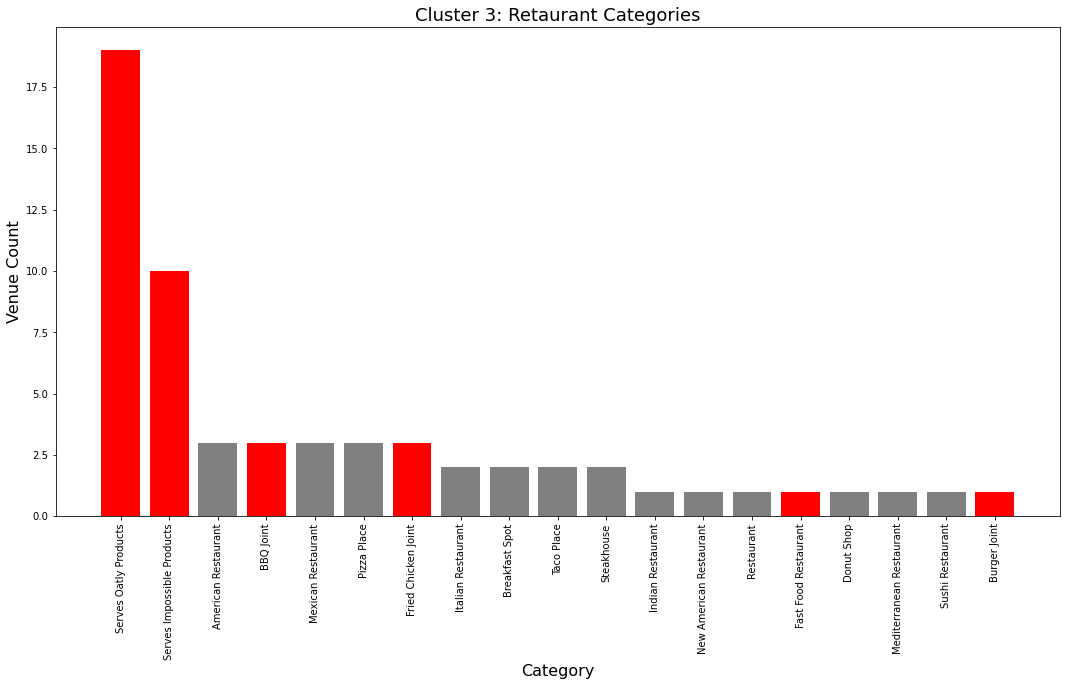

In [18]:

for label in label_group_df.index:
        #bar
    cluster_df = pd.DataFrame(data=label_group_df.T[label].sort_values(ascending=False))
    cluster_df.rename(columns={label: "number_of_venues"},inplace=True)
    cluster_df = cluster_df[cluster_df['number_of_venues'] > 0]
    
    
    print(f'------- Cluster {label} ---------------------------------------------------------------')
    print(cluster_df.loc[[i for i in cluster_df.index if i in of_interest]])
    #map
    num_list = []
    for i in atx['neighname']:
        try:
            label_df = df[df['cluster_label'] == label]
            num_list.append(int(label_df[label_df.index == i].drop(columns='cluster_label').T.sum()))
        except:
            num_list.append(0)
    atx['num_restaurants'] = num_list

    fig, ax = plt.subplots(figsize=(7, 7))
    atx.plot(column='num_restaurants',
             cmap='Reds', 
             ax=ax, 
             scheme='quantiles',
             edgecolor='white',
            legend=True)
    plt.title(f"Cluster {label} Heatmap", fontsize=15)
    plt.xlabel('Longitude', fontsize=12)
    plt.ylabel('Latitude', fontsize=12)
    plt.savefig(f'assets/4_clusters/cluster_{label}_heatmap.png')
    plt.show();
    

    

    plt.figure(figsize=(18,9))
    plt.title(f'Cluster {label}: Retaurant Categories', fontsize=18)
    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Venue Count', fontsize=16)
    plt.xticks(rotation = 90)
    clrs = ['red' if cluster_df.index[i] in of_interest else 'grey' for i in range(0, len(cluster_df))]
    plt.bar(cluster_df.index, cluster_df['number_of_venues'], color=clrs)
    plt.savefig(f'assets/4_clusters/cluster_{label}_bar.png')
    plt.show();
    
    

### Lets Dig into cluster 2 a bit more
- What is the 'of_interest' breakdown by neighborhood for cluster 2?
- What are the actual restaurants that make up cluster 2?
- Why are there so few gradients on the heatmap?
- Can we create a scoreing system for neighborhoods?
    - Sum of restaurants in 'of_interest' by neighborhood?
    - Break out impossible, beyond and oatly counts separate

### What is the 'of_interest' breakdown by neighborhood for cluster 2?

In [19]:
cluster2_df = df[df['cluster_label'] == 2].drop(columns='cluster_label')
cluster2_df.T

neighborhood,ALLANDALE,BERGSTROM,BLUFF SPRINGS,BOULDIN CREEK,EAST CONGRESS,EAST OAK HILL,GARRISON PARK,GOVALLE,HOLLY,JOLLYVILLE,...,PARKER LANE,RIVERSIDE,ROSEDALE,SLAUGHTER CREEK,SOUTH LAMAR,ST. JOHNS,SWEETBRIAR,TECH RIDGE,WINDSOR PARK,ZILKER
American Restaurant,2,3,1,0,0,1,0,2,0,1,...,1,0,2,0,0,0,0,1,1,0
Asian Restaurant,2,0,0,0,0,0,1,0,0,1,...,0,1,1,1,0,0,0,0,0,0
BBQ Joint,0,1,0,1,0,0,1,0,0,0,...,2,0,1,0,1,0,0,0,0,0
Bagel Shop,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bakery,1,0,3,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thai Restaurant,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
Turkish Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vegetarian / Vegan Restaurant,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Vietnamese Restaurant,1,0,0,1,0,0,0,0,0,0,...,2,3,0,1,0,0,0,1,0,0


ALLANDALE restaurants of interest: 7


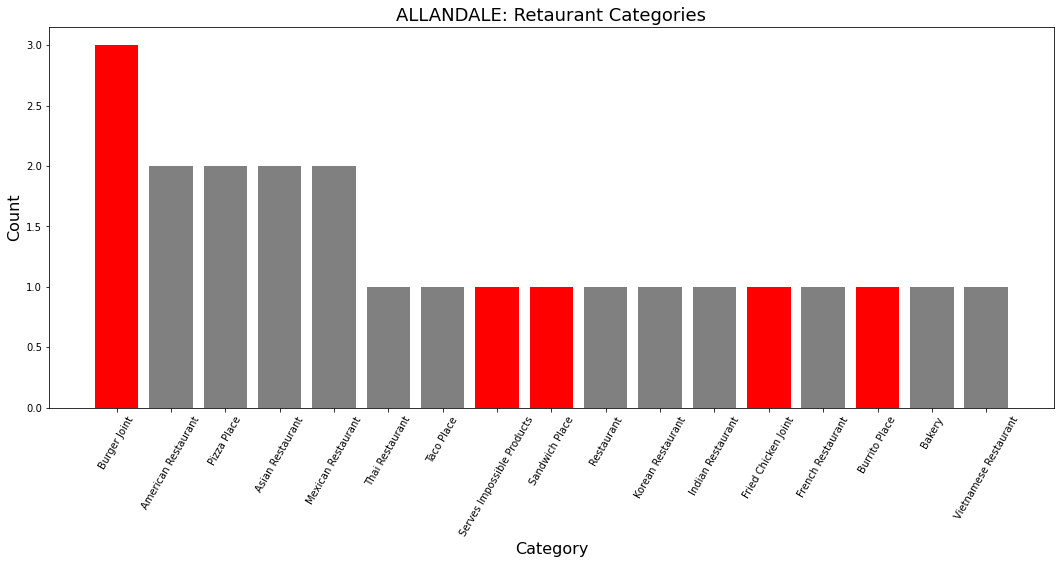

BERGSTROM restaurants of interest: 11


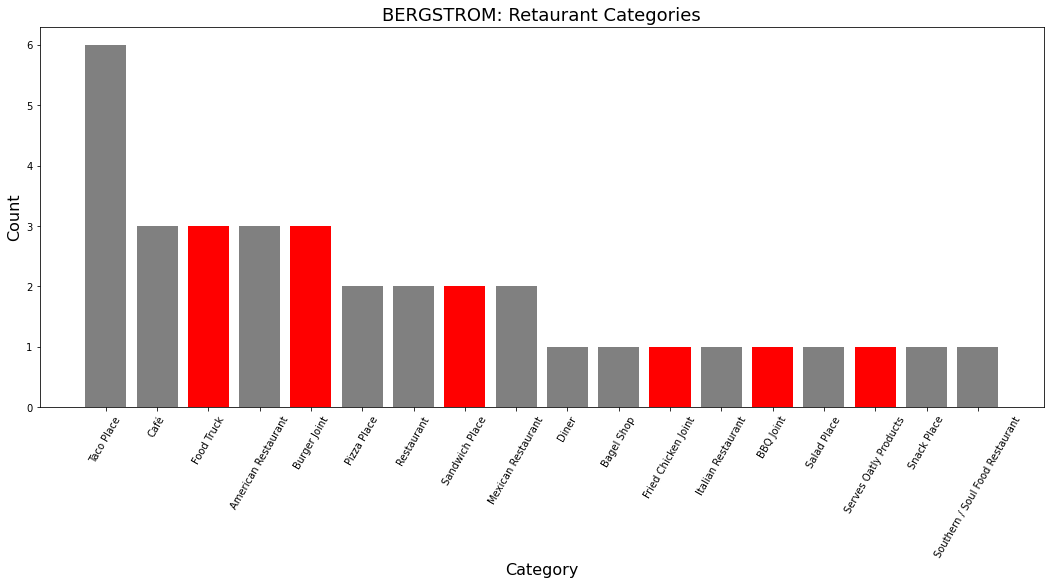

BLUFF SPRINGS restaurants of interest: 4


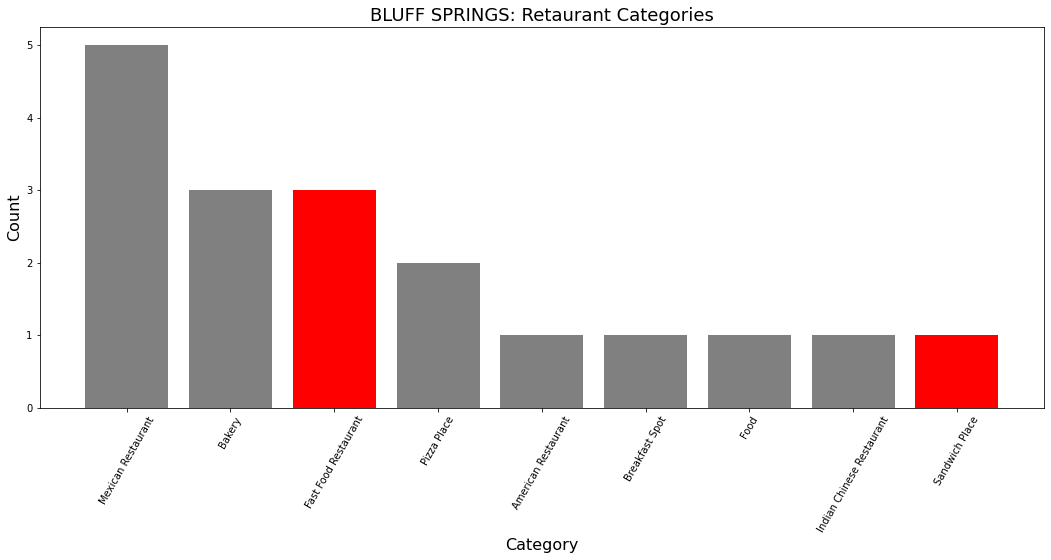

BOULDIN CREEK restaurants of interest: 9


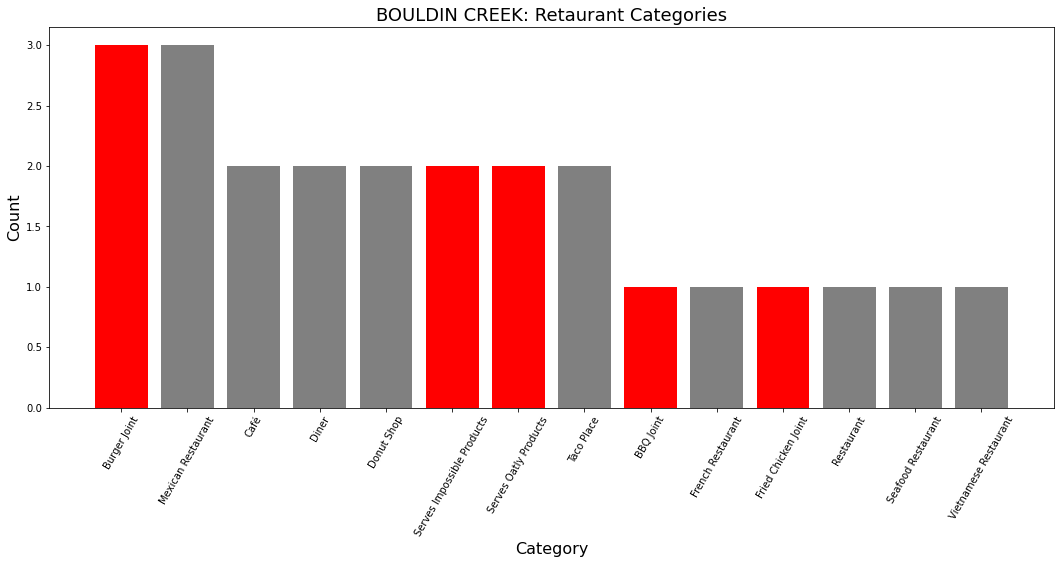

EAST CONGRESS restaurants of interest: 6


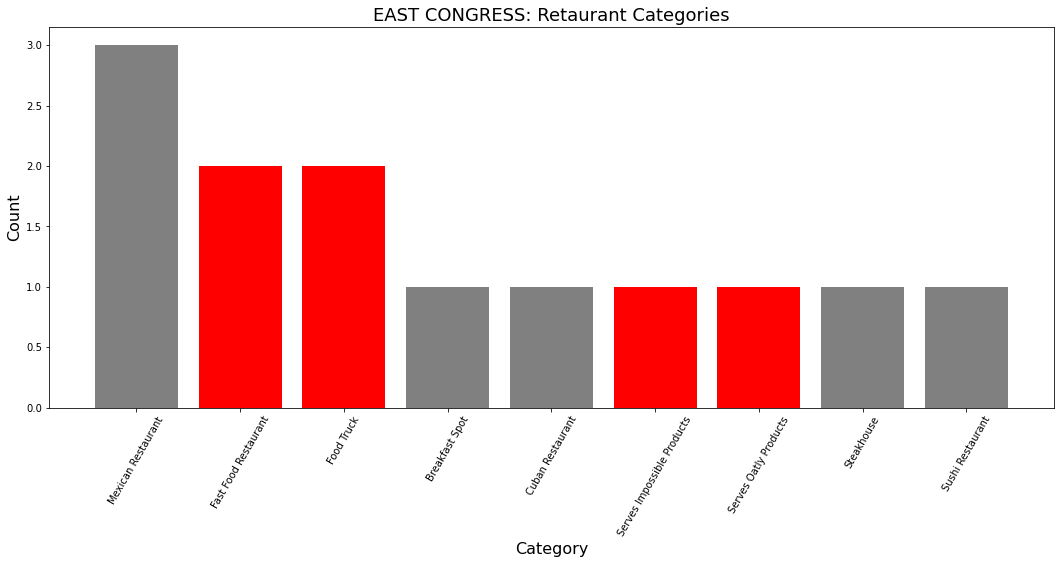

EAST OAK HILL restaurants of interest: 9


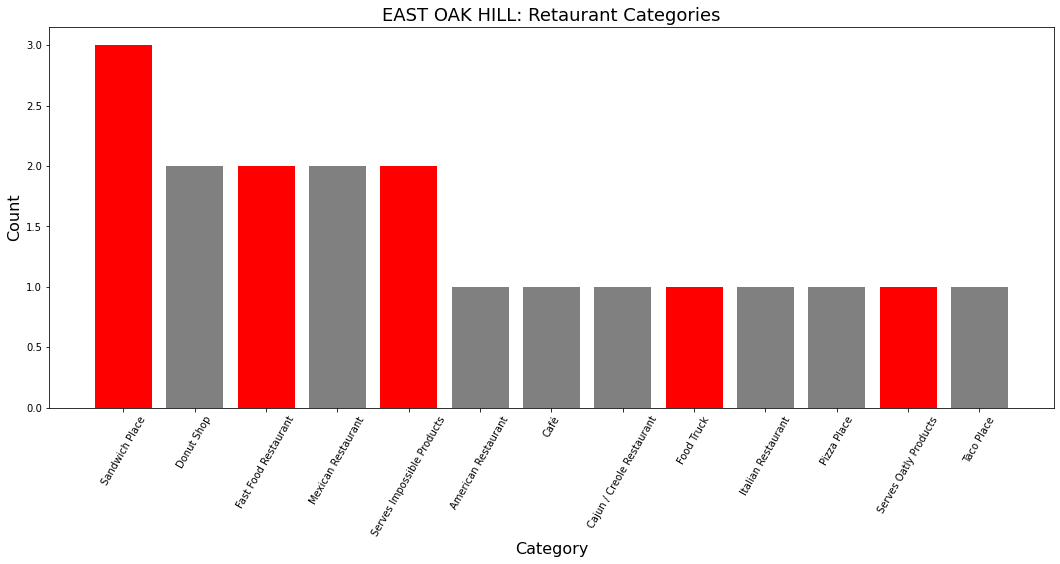

GARRISON PARK restaurants of interest: 4


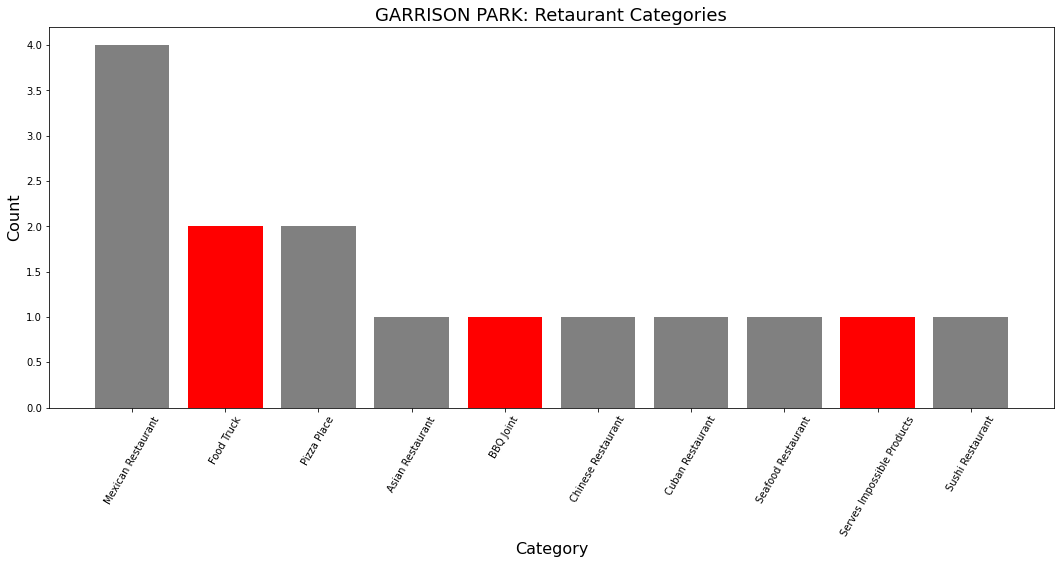

GOVALLE restaurants of interest: 8


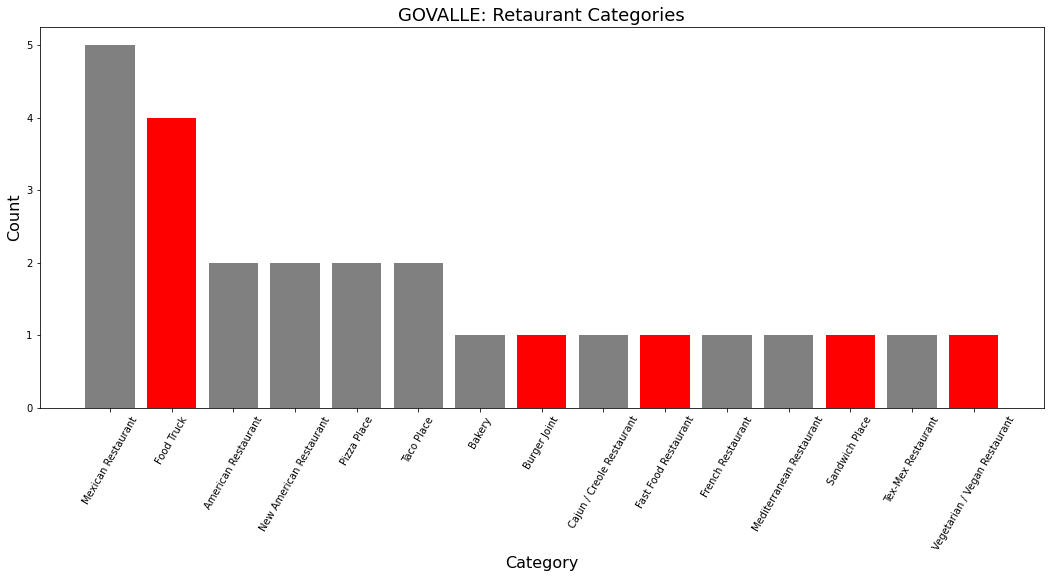

HOLLY restaurants of interest: 10


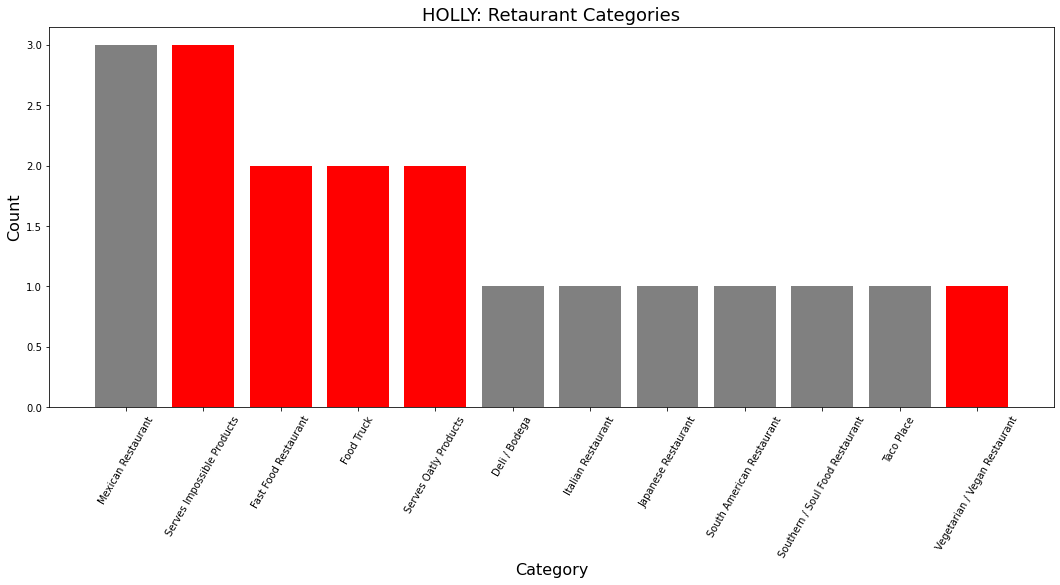

JOLLYVILLE restaurants of interest: 6


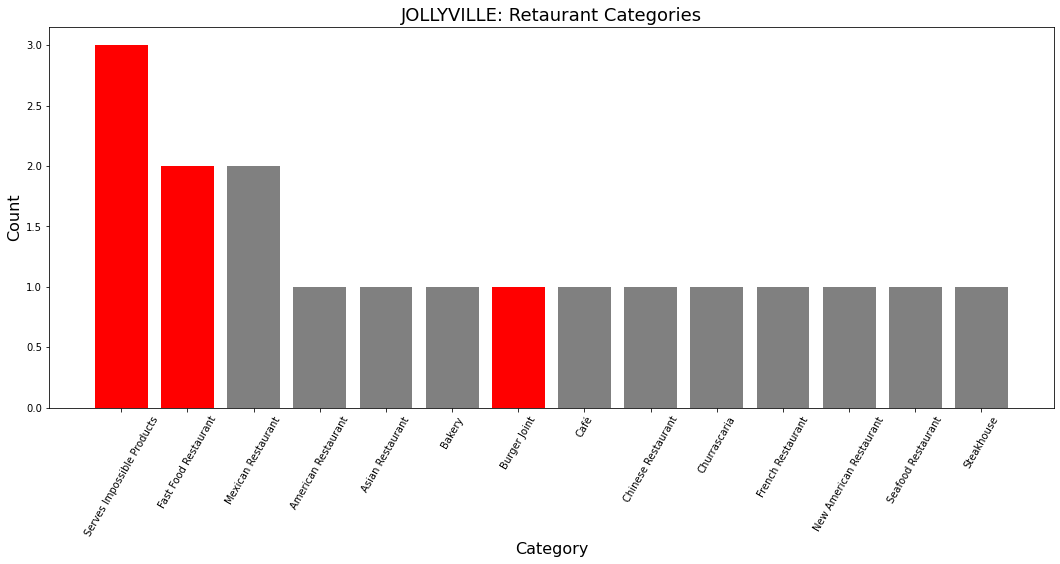

MCKINNEY restaurants of interest: 13


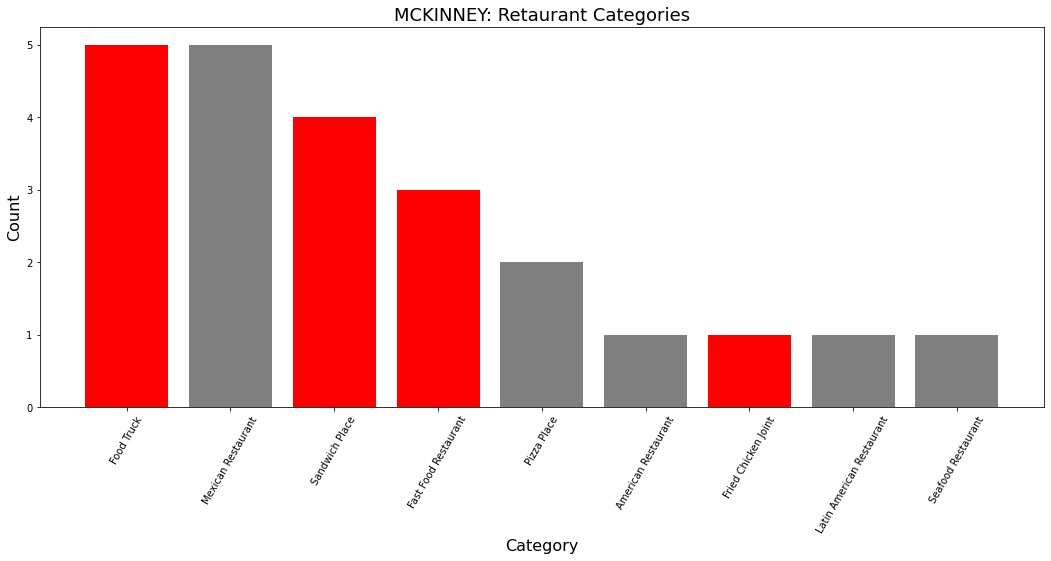

MLK restaurants of interest: 7


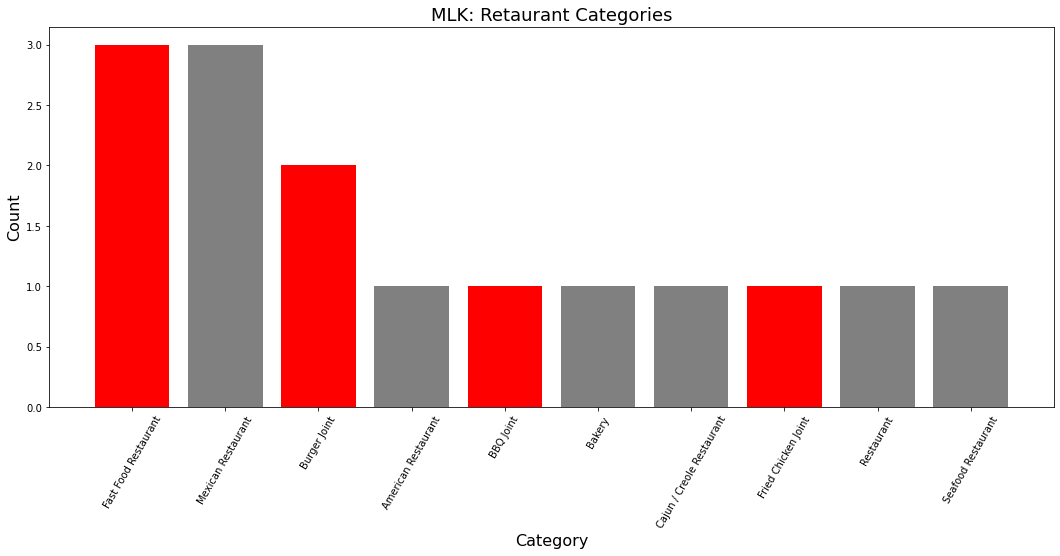

MONTOPOLIS restaurants of interest: 7


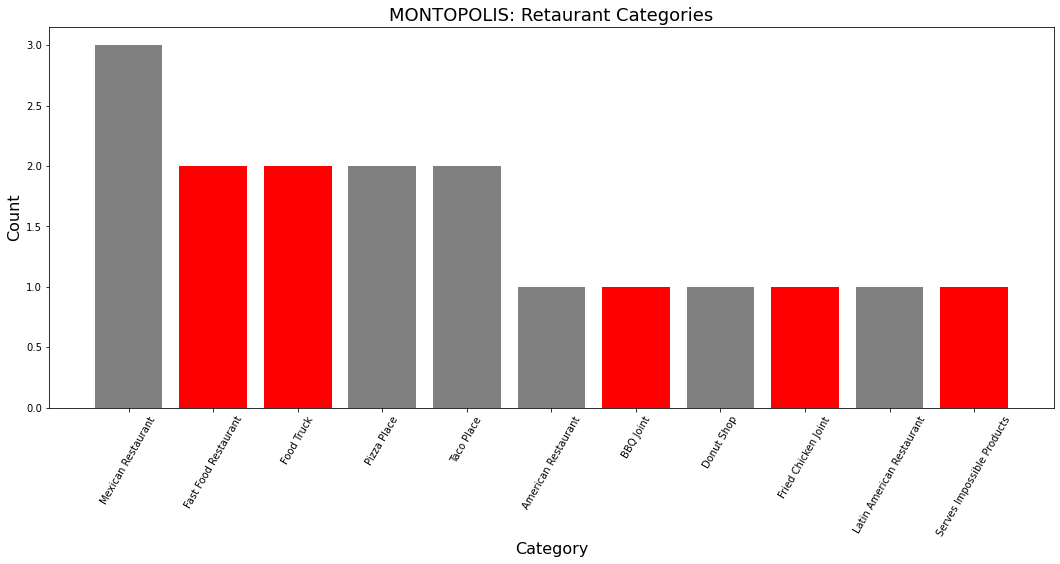

NORTH LAMAR restaurants of interest: 3


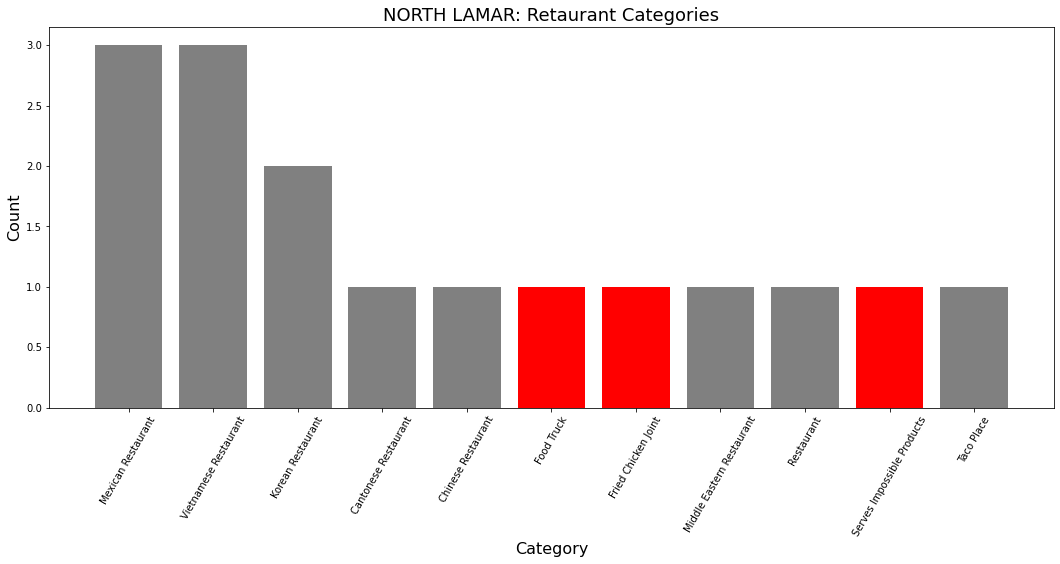

NORTH LAMAR RUNDBERG restaurants of interest: 5


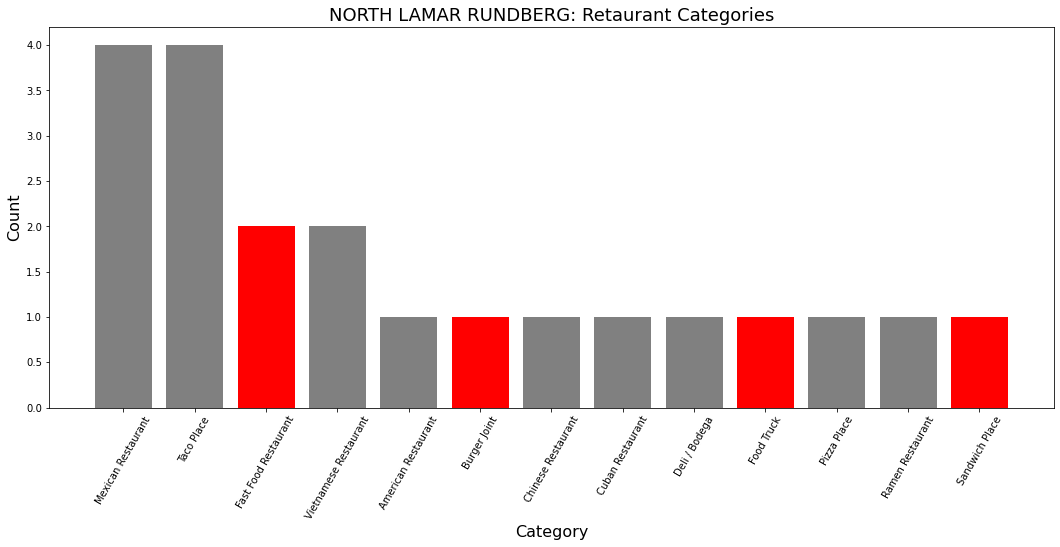

PARKER LANE restaurants of interest: 3


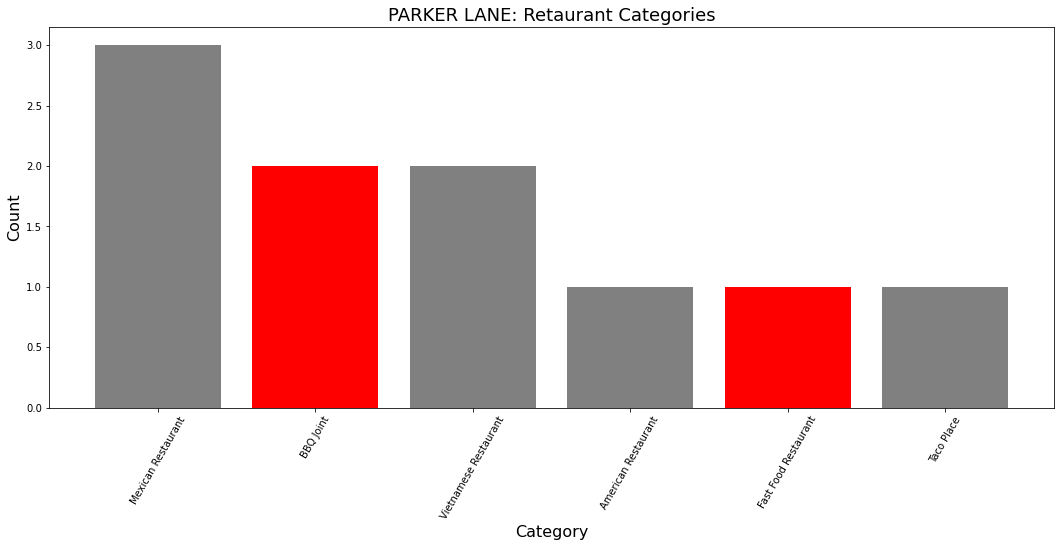

RIVERSIDE restaurants of interest: 11


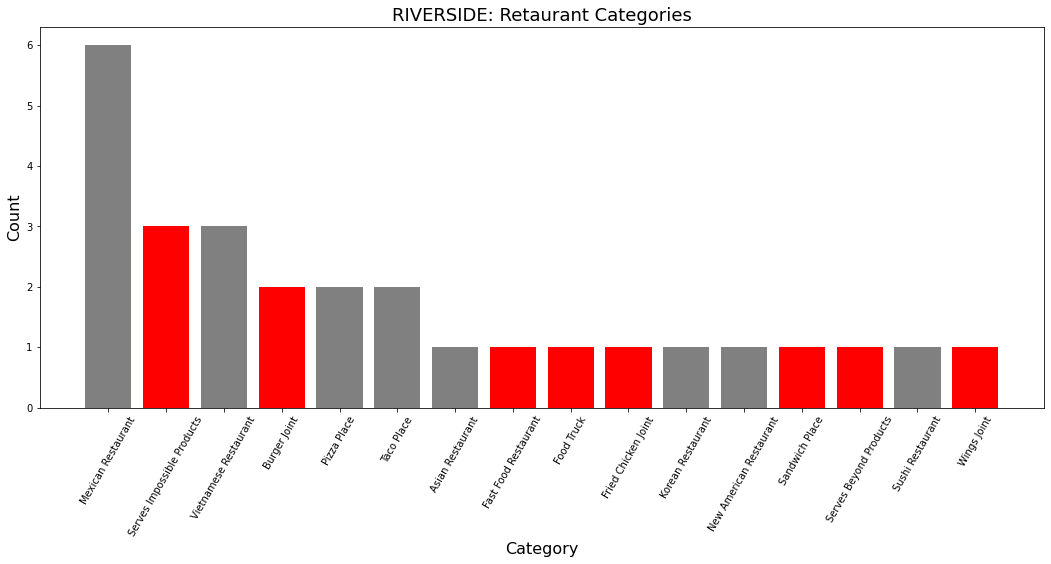

ROSEDALE restaurants of interest: 7


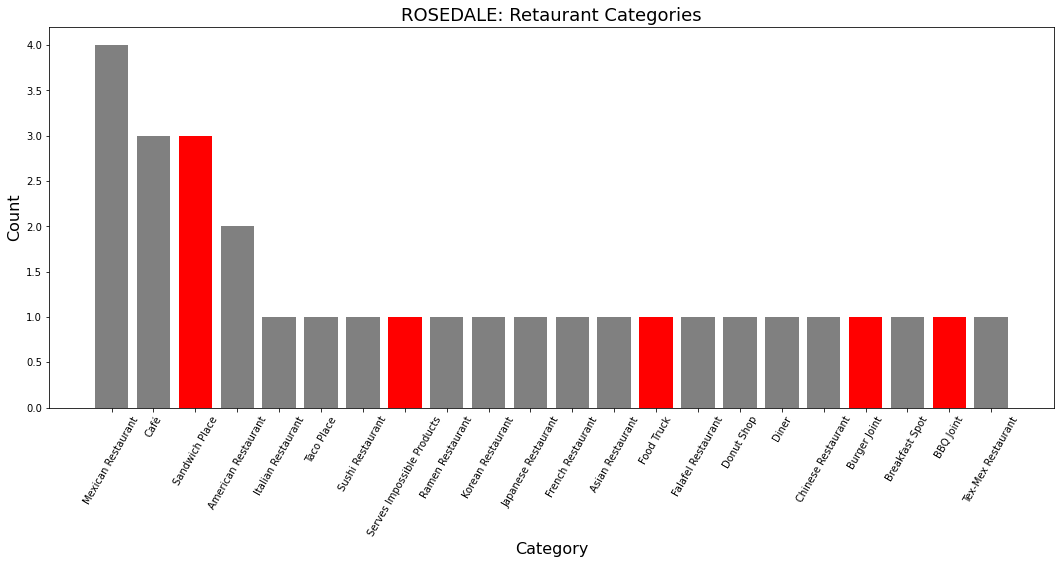

SLAUGHTER CREEK restaurants of interest: 10


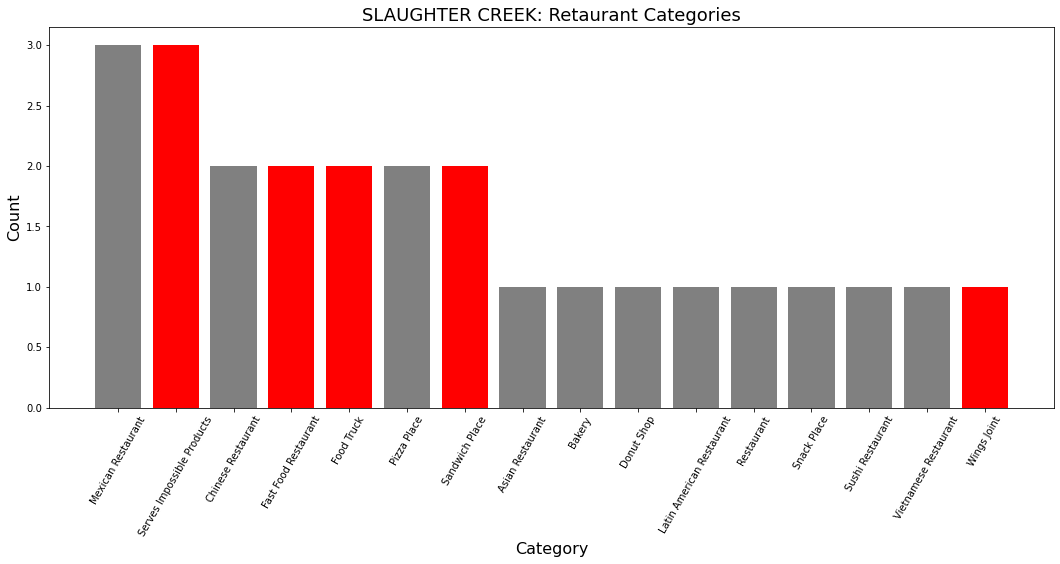

SOUTH LAMAR restaurants of interest: 10


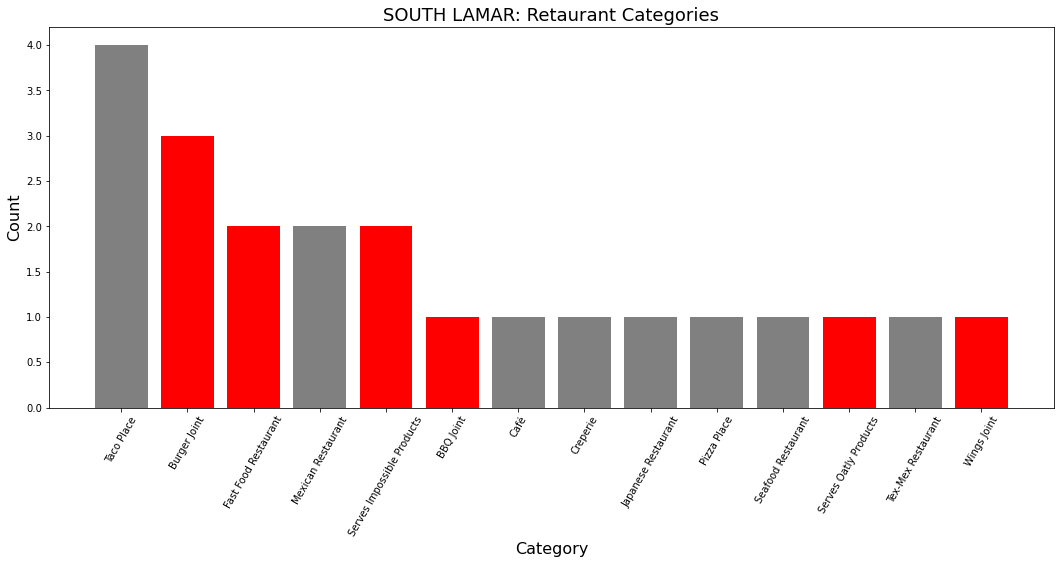

ST. JOHNS restaurants of interest: 5


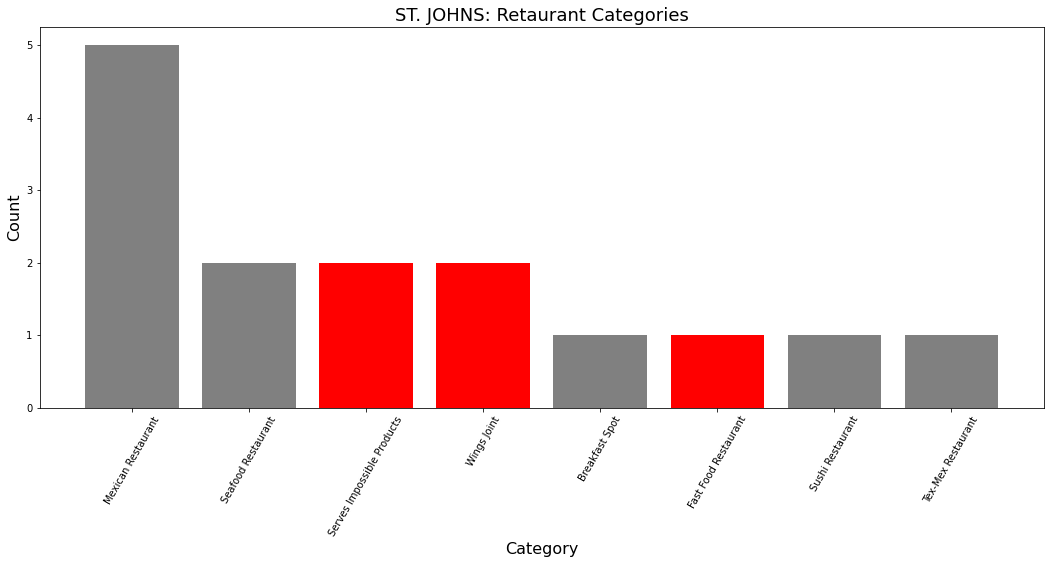

SWEETBRIAR restaurants of interest: 5


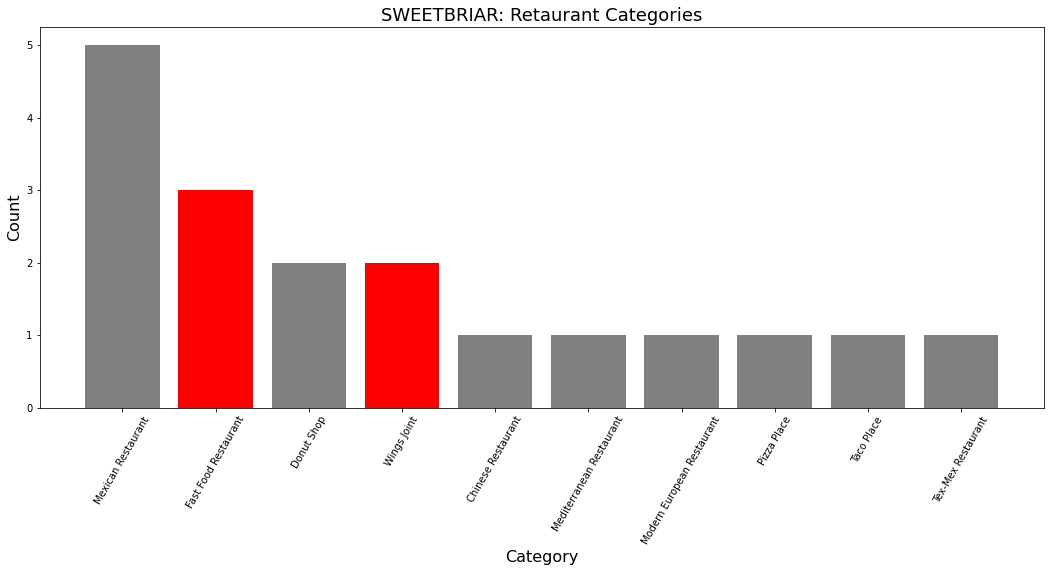

TECH RIDGE restaurants of interest: 9


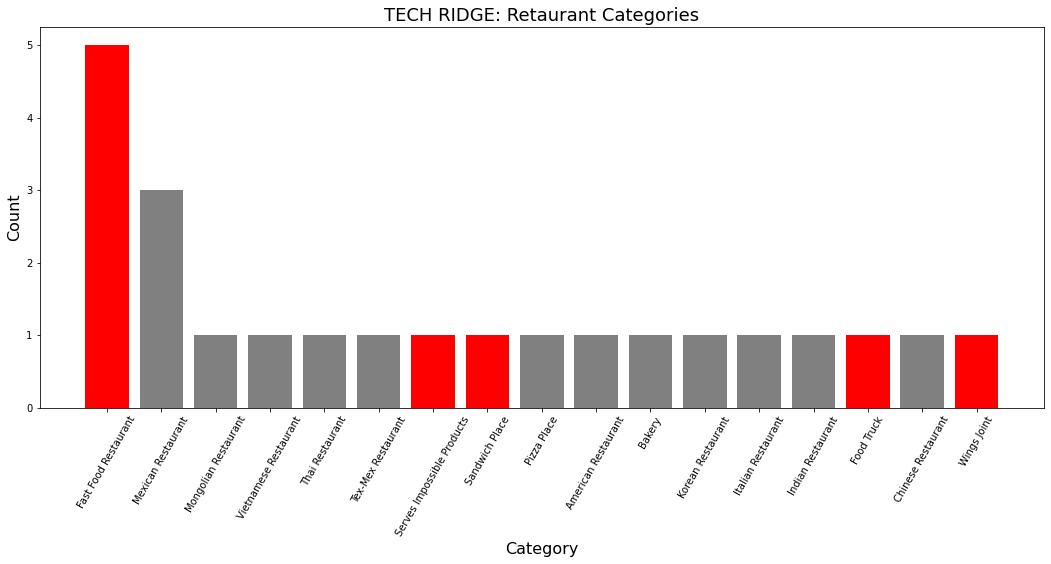

WINDSOR PARK restaurants of interest: 16


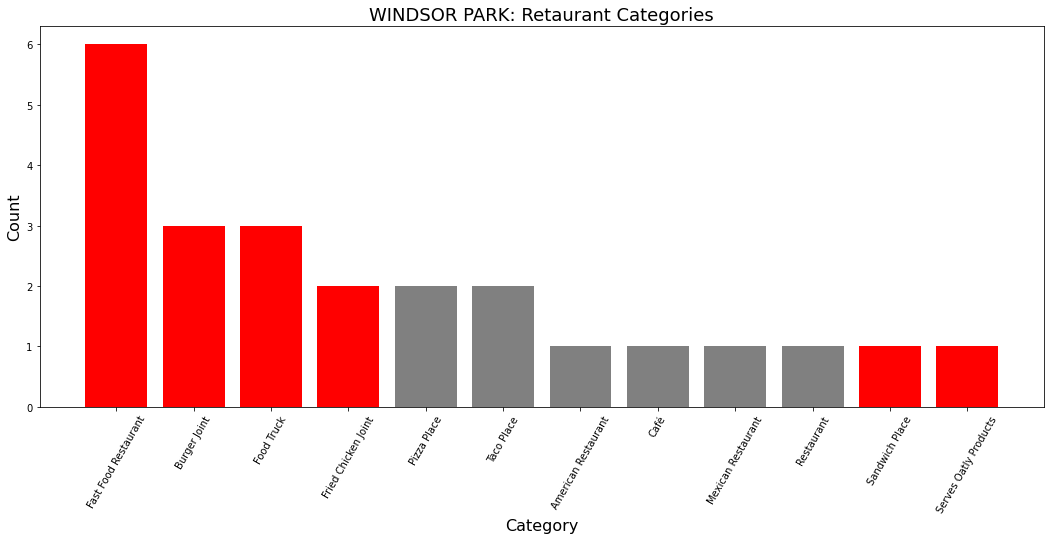

ZILKER restaurants of interest: 9


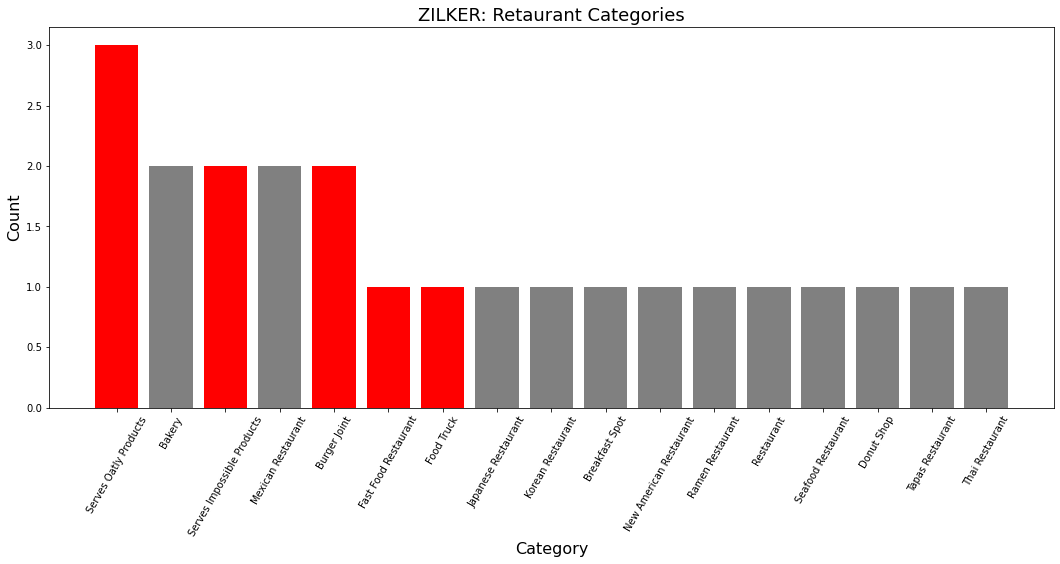

In [20]:
for neighborhood in cluster2_df.index:
    
    cluster2_nhood_df = cluster2_df.loc[neighborhood][cluster2_df.loc[neighborhood] > 0].sort_values(ascending=False)
    
    print(f'{neighborhood} restaurants of interest: {sum([cluster2_nhood_df[i] for i in cluster2_nhood_df.index if i in of_interest])}')
    
    plt.figure(figsize=(18,7))
    plt.title(f'{neighborhood}: Retaurant Categories', fontsize=18)
    plt.xlabel('Category', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.xticks(rotation = 60)
    clrs = ['red' if cluster2_nhood_df.index[i] in of_interest else 'grey' for i in range(0, len(cluster2_nhood_df))]
    plt.bar(cluster2_nhood_df.index, cluster2_nhood_df.values, color=clrs)
    plt.show();

### What are the actual restaurants that make up cluster 2?